Load the dataset using ucimlrepo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [14]:
import pandas as pd

# Combine features and target into a single DataFrame
data = pd.concat([X, y], axis=1)

# Export the combined DataFrame to a CSV file
data.to_csv('cleveland_heart_disease_data.csv', index=False)

- **age**: Age in years.
- **sex**: Sex (1 = male, 0 = female).
- **cp**: Chest pain type 
  - 1 = typical angina
  - 2 = atypical angina
  - 3 = non-anginal pain
  - 4 = asymptomatic
- **trestbps**: Resting blood pressure (in mm Hg on admission).
- **chol**: Serum cholesterol in mg/dl.
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).
- **restecg**: Resting electrocardiographic results 
  - 0 = normal
  - 1 = ST-T wave abnormality
  - 2 = probable left ventricular hypertrophy
- **thalach**: Maximum heart rate achieved.
- **exang**: Exercise induced angina (1 = yes, 0 = no).
- **oldpeak**: ST depression induced by exercise relative to rest.
- **slope**: The slope of the peak exercise ST segment 
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**: Number of major vessels (0-3) colored by fluoroscopy.
- **thal**: Thalassemia 
  - 3 = normal
  - 6 = fixed defect
  - 7 = reversible defect
- **num**: Diagnosis of heart disease 
  - 0 = < 50% narrowing
  - 1+ = > 50% narrowing


Show basic statistical summary and missing values

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic Statistical Summary
print("Basic Statistical Summary:")
print(data.describe())

# Check for Missing Values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

Basic Statistical Summary:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   


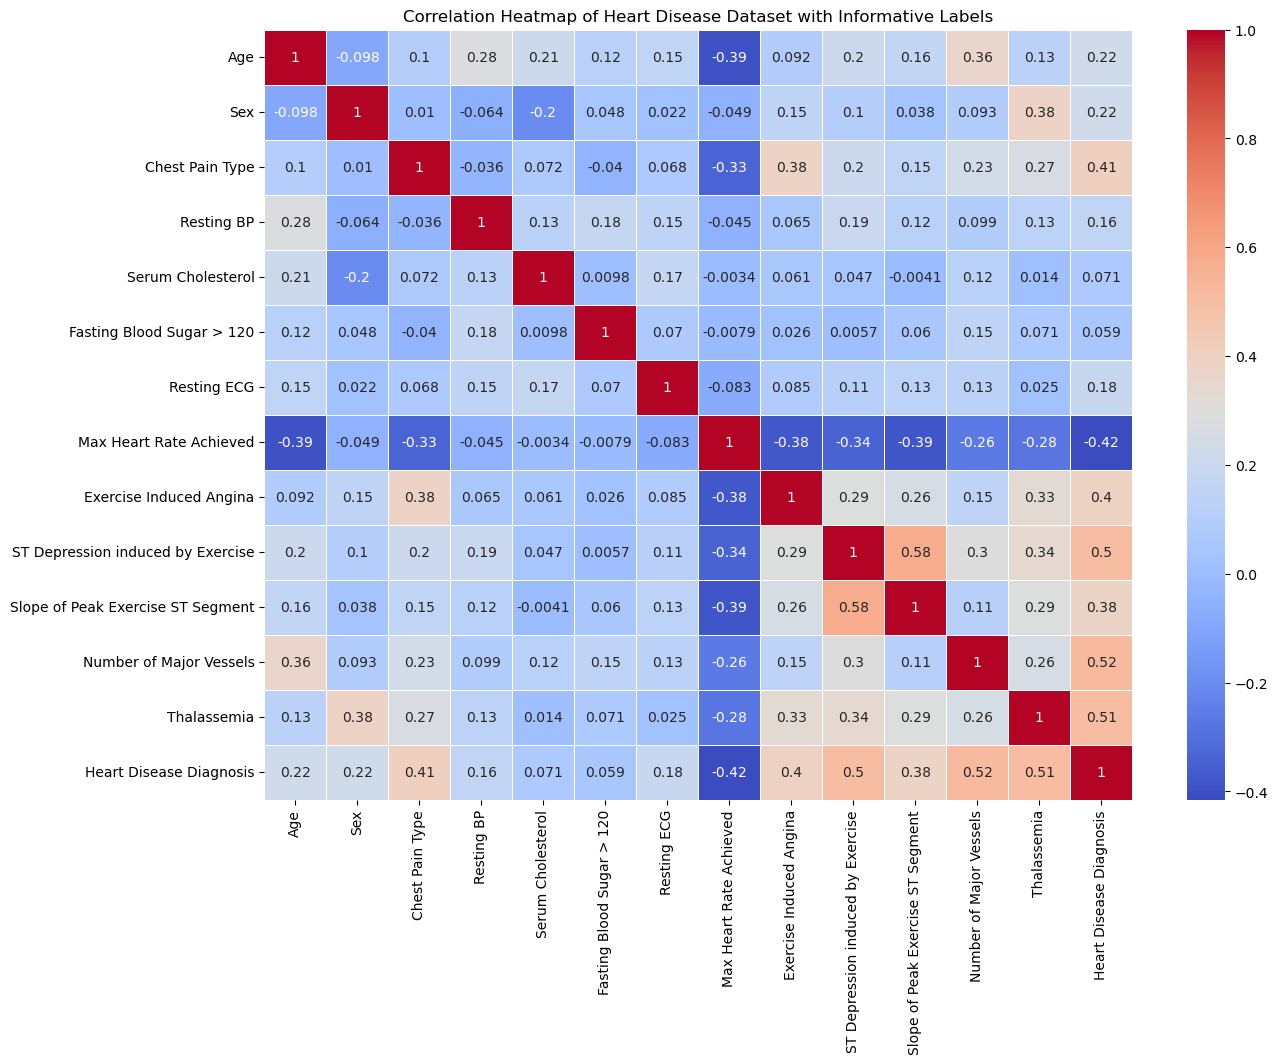

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updating column names to be more informative
data.columns = [
    "Age",
    "Sex",
    "Chest Pain Type",
    "Resting BP",
    "Serum Cholesterol",
    "Fasting Blood Sugar > 120",
    "Resting ECG",
    "Max Heart Rate Achieved",
    "Exercise Induced Angina",
    "ST Depression induced by Exercise",
    "Slope of Peak Exercise ST Segment",
    "Number of Major Vessels",
    "Thalassemia",
    "Heart Disease Diagnosis"
]

# Generate the correlation heatmap with informative labels
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Heart Disease Dataset with Informative Labels')
plt.xticks(rotation=90)
plt.show()

### This graph is a heatmap showing the correlation matrix between various health-related features and heart disease. Correlation values range from -1 to 1
